# 概率

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


In [3]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [4]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 2., 2., 2., 3., 1.])

In [5]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(10000, fair_probs).sample()
counts / 10000  # 相对频率作为估计值

tensor([0.1696, 0.1640, 0.1703, 0.1643, 0.1648, 0.1670])

In [6]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
print(counts, counts.shape)
cum_counts = counts.cumsum(dim=0)
print(cum_counts, cum_counts.shape)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
print(estimates, estimates.shape)

tensor([[1., 1., 1., 1., 3., 3.],
        [1., 2., 1., 2., 4., 0.],
        [0., 1., 4., 2., 2., 1.],
        ...,
        [2., 2., 2., 2., 0., 2.],
        [1., 1., 0., 0., 6., 2.],
        [3., 2., 0., 3., 1., 1.]]) torch.Size([500, 6])
tensor([[  1.,   1.,   1.,   1.,   3.,   3.],
        [  2.,   3.,   2.,   3.,   7.,   3.],
        [  2.,   4.,   6.,   5.,   9.,   4.],
        ...,
        [810., 808., 831., 866., 829., 836.],
        [811., 809., 831., 866., 835., 838.],
        [814., 811., 831., 869., 836., 839.]]) torch.Size([500, 6])
tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.3000, 0.3000],
        [0.1000, 0.1500, 0.1000, 0.1500, 0.3500, 0.1500],
        [0.0667, 0.1333, 0.2000, 0.1667, 0.3000, 0.1333],
        ...,
        [0.1627, 0.1622, 0.1669, 0.1739, 0.1665, 0.1679],
        [0.1625, 0.1621, 0.1665, 0.1735, 0.1673, 0.1679],
        [0.1628, 0.1622, 0.1662, 0.1738, 0.1672, 0.1678]]) torch.Size([500, 6])


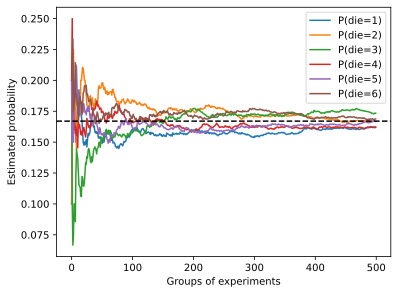

In [7]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();